In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [0]:
#fraude = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/Fraud_Data.csv?token=AOGGXRTMKPYKQBTNO2N4NP26H3XSA")
#ipaddress = pd.read_csv("https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.4%20--%20R%C3%A9duction%20de%20Dimensions%20%26%20Boosting/Projet%20--%20FRAUDULENT%20ACTIVITIES/Datasets/IpAddress_to_Country.csv?token=AOGGXRXVI4KDNKCXI6AZZI26HLO44")

In [0]:
fraude = pd.read_csv("/content/data_country.csv")

In [0]:
fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null int64
resultat          151112 non-null int64
Date_Diff         151112 non-null int64
pays              151112 non-null object
dtypes: int64(6), object(7)
memory usage: 15.0+ MB


In [0]:
fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,resultat,Date_Diff,pays
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,4506682,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,17944,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,492085,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,4361461,United States


In [0]:
fraude=fraude.rename(columns = {'class':'resultat'})

In [0]:
fraude.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
resultat          False
Date_Diff         False
pays              False
dtype: bool

In [0]:
fraude["purchase_value"].max()

154

In [0]:
ipaddress.head(10)

In [0]:
ipaddress.isnull().any()

lower_bound_ip_address    False
upper_bound_ip_address    False
country                   False
dtype: bool

In [0]:
#conversion des données en int et colonne class renommée en resultat

fraude['ip_address'] = fraude['ip_address'].astype(int)
ipaddress['lower_bound_ip_address'] = abs(ipaddress['lower_bound_ip_address'].astype(int))
ipaddress['upper_bound_ip_address'] = abs(ipaddress['upper_bound_ip_address'].astype(int))
fraude=fraude.rename(columns = {'class':'resultat'})

In [0]:
ipaddress=ipaddress.sort_values(['lower_bound_ip_address'], ascending=True)

In [0]:
fraude.purchase_time= pd.to_datetime(fraude.purchase_time)
fraude.signup_time= pd.to_datetime(fraude.signup_time)

In [0]:
Test_d=fraude['purchase_time']-fraude['signup_time']

In [0]:
fraude['Date_Diff']=(Test_d/np.timedelta64(1,'s')).astype(int) #pd.Series(delta.seconds for delta in (Test_d))

#ou fraude['Date_Diff'] = pd.to_numeric(X.purchase - X.signup)/(1000000000)

In [0]:
fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,resultat,Date_Diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,4506682
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,492085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,4361461


In [0]:
# Fonction pour amener le nom des pays du dataset secondaire vers le dataset principal
def transform_ip(arg) :
    try :
        return ipaddress.country[(ipaddress.lower_bound_ip_address < arg) & (ipaddress.upper_bound_ip_address > arg)].iloc[0]
    except IndexError :
        return "Pays inconnu"
fraude["pays"] = fraude.ip_address.apply(transform_ip)

In [0]:
#fraude.to_csv (r'C:\Users\Admin\Desktop\data\data_country.csv', index = None, header=True) #creation fichier IP countries
#ou lecture fichier 
fraude = pd.read_csv("/content/data_country.csv")

In [0]:
fraude=fraude.sort_values(['ip_address'], ascending=True)

# DATA VISUALISATION

In [0]:
#distribution de l'ensemble purchase_value sachant fraude et non fraude
data_purchase_value=fraude.purchase_value.value_counts()

Les purchase_value de chaque opération peuvent varier de 0 à 3400. Bcp d'achats autour de 3100 et en dessous de 100.

[Text(0.5, 0, 'purchase_value'),
 Text(0.5, 1.0, "Distribution de l'ensemble des purchase_value (sachant fraude et non fraude)")]

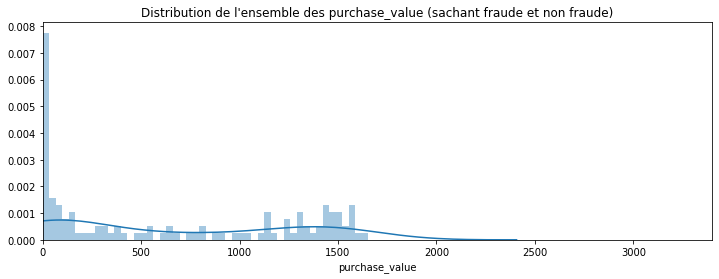

In [0]:
fig, ax0=plt.subplots(figsize=(12,4))
ax0=sns.distplot(data_purchase_value, bins=50, ax=ax0)
plt.xlim(0,3400)
ax0.set(title="Distribution de l'ensemble des purchase_value (sachant fraude et non fraude)", xlabel="purchase_value")

In [0]:
#isolement des resultats positifs (fraudes) dans un dataset
dataset=fraude #dataset représente le jeu de données global (resultat =0 ou 1)
fraude=fraude[fraude.resultat==1]

ce plot montre que la médiane de la purchase_value des opérations frauduleuses est en-dessous de 40. Peu de purchase_value au-dessus de 90. Donc peu d'opérations frauduleuses à gros montants.

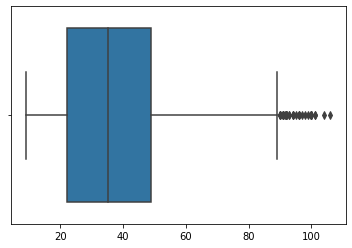

In [0]:
sns.boxplot(['purchase_value'], data=fraude)

In [0]:
print("la purchase_value moyenne en cas de fraude est de {}$ +/- {}$" .format(round(fraude.purchase_value.mean(),2),(round(fraude_light.purchase_value.std(),2))))
print("la purchase_value max en cas de fraude est de {}$" .format(fraude.purchase_value.max()))
print("la purchase_value min en cas de fraude est de {}$" .format(fraude.purchase_value.min()))

la purchase_value moyenne en cas de fraude est de 36.99$ +/- 18.4$
la purchase_value max en cas de fraude est de 111$
la purchase_value min en cas de fraude est de 9$


In [0]:
#Nb de fraudes en fonction de la purchase_value
data_purchase_value3=fraude.groupby('purchase_value').sum()
chart_data_purchase_value3=pd.DataFrame(data_purchase_value3.sort_values('resultat',ascending=False)).reset_index()

Distribution du nb de fraudes à tendance plutôt uniforme en-dessous d'une purchase value de 50

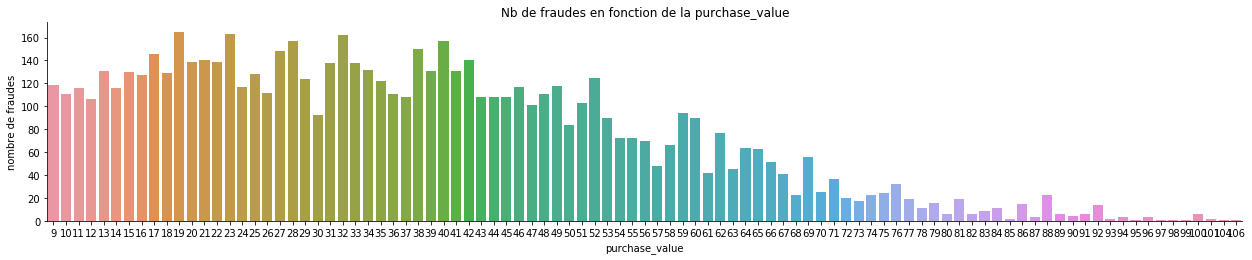

In [0]:
#fig, ax3=plt.subplots(figsize=(12,5))
ax3=sns.catplot(x='purchase_value', y='resultat', data=chart_data_purchase_value3, kind='bar', height = 3.5, aspect = 5)
ax3.set(title="Nb de fraudes en fonction de la purchase_value", xlabel="purchase_value",ylabel="nombre de fraudes")

In [0]:
#Nombre de commandes par device_id. Nous filtrons, seules les occurences supérieures à 3.
data_device_id=fraude.device_id.value_counts()
chart_data_device_id=pd.DataFrame(data_device_id.sort_values(ascending=False)).reset_index()
chart_data_device_id=chart_data_device_id.rename(columns = {'index':'device_id','device_id':'nombres_de_commandes'})
chart_data_device_id=chart_data_device_id[chart_data_device_id.nombres_de_commandes>3]

les device_id réalisant les fraudes peuvent opérer jusqu'à 20 commandes. Les fraudeurs peuvent récidiver avec la même machine.

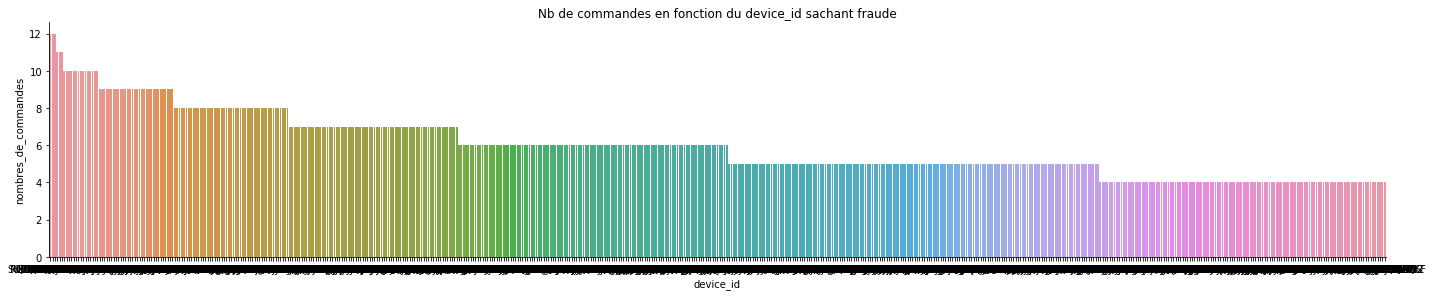

In [0]:
#fig, ax4=plt.subplots(figsize=(18,5))
ax4=sns.catplot(x='device_id', y='nombres_de_commandes', data=chart_data_device_id, kind='bar', height = 4, aspect = 5)
ax4.set(title="Nb de commandes en fonction du device_id sachant fraude", xlabel="device_id")

for num_figure in plt.get_fignums()[1:]:
  plt.close(num_figure)


In [0]:
#Montant total des commandes en fonction du device_id
data_device_id2=fraude.groupby('device_id').sum()
chart_data_device_id2=pd.DataFrame(data_device_id2.sort_values('purchase_value',ascending=False)).reset_index()

print("le montant total moyen des achats par device_id en cas de fraude est de {}$ +/- {}$" .format(round(chart_data_device_id2.purchase_value.mean(),2),(round(chart_data_device_id2.purchase_value.std(),2))))
print("le montant total max des achats par device_id en cas de fraude est de {}$" .format(chart_data_device_id2.purchase_value.max()))
print("le montant total min des achats par device_id en cas de fraude est de {}$" .format(chart_data_device_id2.purchase_value.min()))


le montant total moyen des achats par device_id en cas de fraude est de 67.08$ +/- 83.6$
le montant total max des achats par device_id en cas de fraude est de 774$
le montant total min des achats par device_id en cas de fraude est de 9$


Un même device_id peut cumuler jusqu'à 1377 d'achats frauduleux. Si une opération frauduleuse unitaire est discrète en terme de terme de purchase_value, le montant cumulé de l'historique d'achats d'un même device_id peut être important.

(0, 800)

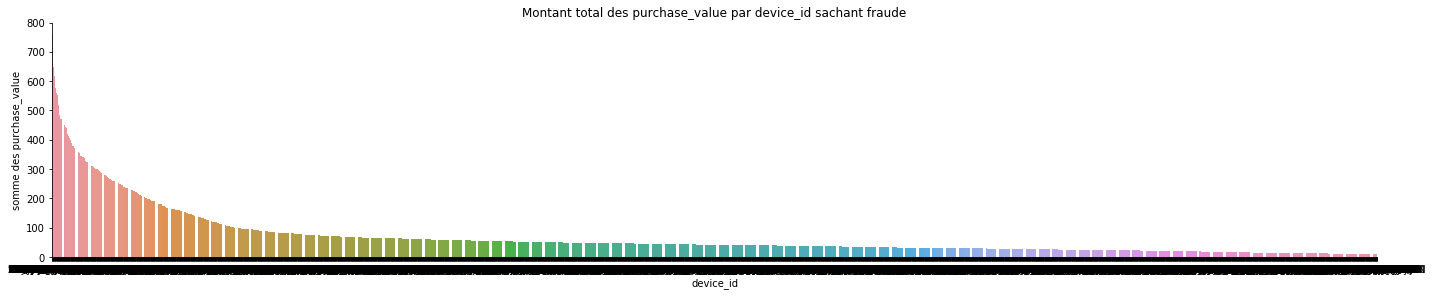

In [0]:
#fig, ax5=plt.subplots(figsize=(12,5))
ax5=sns.catplot(x='device_id', y='purchase_value', data=chart_data_device_id2, kind='bar', height = 4, aspect = 5)
ax5.set(title="Montant total des purchase_value par device_id sachant fraude", xlabel="device_id",ylabel="somme des purchase_value" )
plt.ylim(0,800)


In [0]:
#Top10 des pays origines en terme de nombres de fraudes
data_country=fraude.groupby('pays').sum()
data_country=pd.DataFrame(data_country.sort_values('resultat',ascending=False)).reset_index()

#Top10 des pays origines en terme de montant total de fraudes
data_country2=pd.DataFrame(data_country.sort_values('purchase_value',ascending=False)).reset_index()
chart_data_country2=data_country2.loc[:9,['pays','purchase_value']].sort_values('purchase_value',ascending=True)

In [0]:
chart_data_country1=data_country.loc[:9,['pays','resultat']].sort_values('resultat',ascending=True)

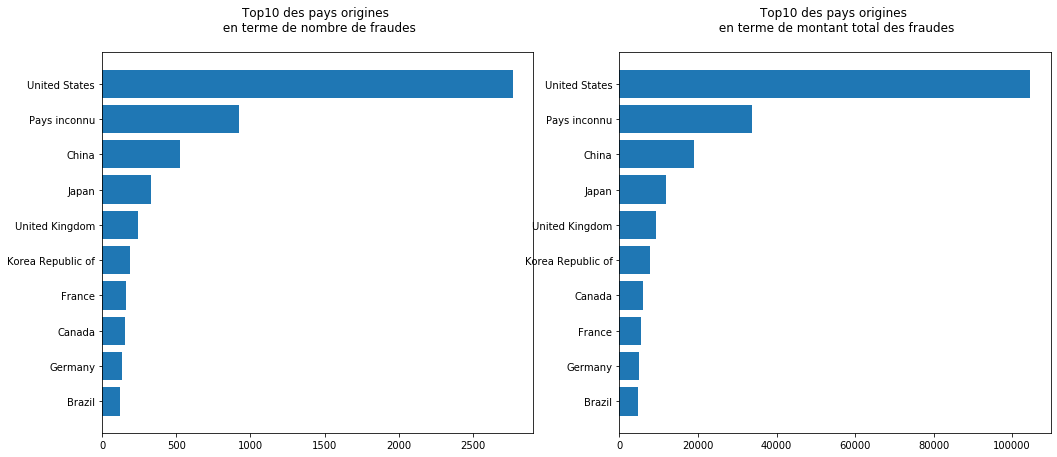

In [0]:
fig, ([ax10, ax11]) = plt.subplots(1,2, figsize=(17,7))

ax10.barh(chart_data_country1.pays, chart_data_country1.resultat)
ax10.set_title("Top10 des pays origines \n en terme de nombre de fraudes\n")


ax11.barh(chart_data_country2.pays, chart_data_country2.purchase_value)
ax11.set_title("Top10 des pays origines \n en terme de montant total des fraudes\n")
plt.show()

Une grande quantité de fraudes a pour pays d'origine United States suivi de Pays inconnus.

Text(0.5, 1.0, 'Répartition par pourcentage des montants totaux des fraudes par pays')

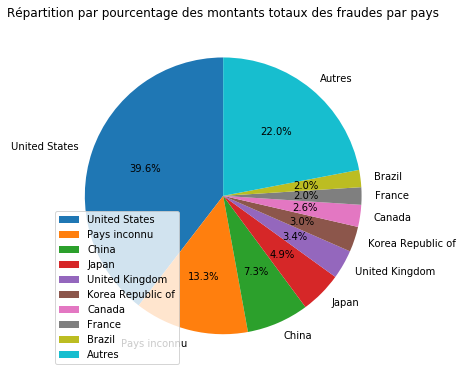

In [0]:
#répartition par pourcentage des montants des fraudes par pays
chart_data_country3=data_country2.loc[:,['pays','purchase_value']].sort_values('purchase_value',ascending=False)
chart_data_country3=chart_data_country3.groupby('pays').sum()
chart_data_country3=pd.DataFrame(chart_data_country3.sort_values('purchase_value',ascending=False)).reset_index()

repartition=[i for i in chart_data_country3.purchase_value[:9]]
som_top=sum(chart_data_country3.purchase_value[:9])
som_autres=sum(chart_data_country3.purchase_value[9:])
repartition.append(som_autres)

m=[labels for labels in chart_data_country3.pays[:9]]
m.append('Autres')

plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.pie(repartition,labels=m, autopct='%1.1f%%', shadow=False, startangle=90)

plt.legend(loc="lower left")
plt.title("Répartition par pourcentage des montants totaux des fraudes par pays")

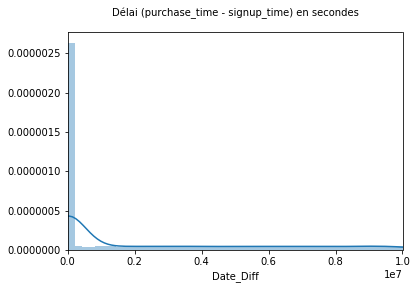

In [0]:
#distribution des délais entre inscription et opération d'achat sachant fraude
sns.distplot(fraude.Date_Diff, bins=50);
plt.title('Délai (purchase_time - signup_time) en secondes', y=1.05, size=10)
plt.xlim(0,10**7)
plt.show()

In [0]:
fraude.Date_Diff.median()
print("la médiane délai entre (purchase_time et signup_time) des fraudes est de {}s" .format(fraude_light.Date_Diff.median()))

la médiane délai entre (purchase_time et signup_time) des fraudes est de 1.0s


Une des caractéristiques d'explication de la fraude pourrait être le délai très court entre purchase_time et signup_time. 

In [0]:
#Montant total des commandes en fonction du user_id
data_user_id=fraude.groupby('user_id').sum()
chart_data_user_id=pd.DataFrame(data_user_id.sort_values('purchase_value',ascending=False)).reset_index()

Pas d'observation de fraudes multiples en classant par user_id.

In [0]:
data_user_id

,purchase_value,age,ip_address,resultat,Date_Diff
user_id,,,,,
39,31,50,3142341272,1,1
44,33,33,4116284408,1,9216023
100,27,36,2776528971,1,6597371
101,47,36,3492388077,1,5878062
123,37,54,3799088341,1,1
...,...,...,...,...,...
399916,66,36,399358891,1,1
399944,21,54,2441563512,1,1
399974,15,28,214120626,1,1


# FEATURE ENGINEERING

Le délai entre **signuptime** et **purchasetime** permettait de soupçonner une fraude (notamment 1s). Pour donner cette info au modèle, on crée une variable catégorielle **categorical_time** selon 5 quantiles de délais. Sur le même principe, on a voulu apporter deux informations supplémentaires au modèle visant à porter l’attention sur certains utilisateurs. L’EDA a montré un signe de fraude lié au nb de commandes par device_id et un autre lié au montant total des commandes par un même device_id. Ce sont deux informations liées à l’historique des achats.
On créé deux variables catégorielles: 

1/**frequent_user** : 0 ou 1. 1 si historique du nb de commandes est >=3 pour un même device_id.

2/**client_quality** : bronze/silver/gold/premium. Ce grade est donné en fonction de l’historique du montant total des commandes par un même device_id. Les classes sont 0-75,75-125,125-175,+175.

La liste des pays est très vaste. Nous créons une variable catégorielle **worldwide_zone** qui regroupe les pays selon leur zone géographique. Ainsi on réduit le nombre de variables.

Nous allons aussi utiliser une variable **categorical_age** pour répartir les ages selon 6 classes.


In [0]:
#Lecture fichier dataset feature engineering
#dataset = pd.read_csv("/content/dataset_FE.csv")

In [0]:
#Création d'un New feature frequent_user. On repère les utilisateurs ayant déjà réalisé plus de 3 commandes.
dataset['frequent_user']=dataset.device_id.apply(lambda x: 1 if data_device_id.values[data_device_id.index==x]>=3
                                                 else 0)

In [0]:
#Création d'un New Feature client_quality : quatre grades accordés selon l'historique du montant total des commandes du device_id.
dataset['client_quality']=dataset.device_id.apply(lambda x: 'premium' if data_device_id2.purchase_value.values[data_device_id2.index==x]>=175
                                                else 'gold' if data_device_id2.purchase_value.values[data_device_id2.index==x]>=125
                                                else 'silver' if data_device_id2.purchase_value.values[data_device_id2.index==x]>=75
                                                else 'bronze')

In [0]:
#Création d'une New feature categorical_time. 
dataset['categorical_time'] = pd.cut(dataset['Date_Diff'], 5, labels=False)

In [0]:
#Création d'une New feature categorical_age. 
labels=["20-25 yo","25-30 yo","30-35 yo","35-50 yo","50-65 yo","65-80 yo"]
dataset['categorical_age'] = pd.cut(dataset['age'], 
                                    [0,25,30,35,50,65,80],
                                    right=False,
                                    labels=labels)

In [0]:
dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,resultat,Date_Diff,pays,frequent_user,client_quality,categorical_time,categorical_age
110447,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,1763014,Pays inconnu,0,bronze,0,35-50 yo
2589,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,1084823,Pays inconnu,0,bronze,0,30-35 yo
16752,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,749320,Pays inconnu,0,bronze,0,30-35 yo
51261,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,7434634,Pays inconnu,0,bronze,3,35-50 yo
17,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,1407619,Pays inconnu,0,bronze,0,35-50 yo


In [0]:
dataset.pays.unique()

array(['Pays inconnu', 'Japan', 'China', 'Viet Nam', 'Hong Kong',
       'Korea Republic of', 'Australia',
       'Taiwan; Republic of China (ROC)', 'France', 'European Union',
       'United Kingdom', 'Italy', 'Ukraine', 'Kazakhstan', 'Saudi Arabia',
       'Russian Federation', 'Denmark', 'Norway', 'Germany',
       'Iran (ISLAMIC Republic Of)', 'Sweden', 'United States', 'Romania',
       'Turkey', 'United Arab Emirates', 'Czech Republic', 'Netherlands',
       'Switzerland', 'Azerbaijan', 'Austria', 'New Zealand', 'India',
       'Singapore', 'Canada', 'Poland', 'Cyprus', 'Indonesia', 'Spain',
       'Portugal', 'Kuwait', 'Belarus', 'Hungary', 'Moldova Republic of',
       'Pakistan', 'South Africa', 'Egypt', 'Sudan', 'Algeria', 'Nigeria',
       'Libyan Arab Jamahiriya', 'Malaysia', 'Lebanon', 'Israel',
       'Belgium', 'Greece', 'Finland', 'Virgin Islands (U.S.)',
       'Macedonia', 'Malta', 'Lithuania', 'Ireland', 'Latvia', 'Estonia',
       'Bulgaria', 'Uzbekistan', 'Croatia 

In [0]:
african_country = ["Algeria","Tunisia","South Africa","Egypt","Sri Lanka","Nigeria","Djibouti",
                   "Saudi Arabia","Morocco","Namibia","Azerbaijan","Malawi","Angola","Zambia",
                   "Kenya","Sudan","Cote D'ivoire", "Senegal","Gabon","Libyan Arab Jamahiriya",
                   "Mozambique","Ethiopia","Ghana","South Sudan","Congo","Uganda","Jamaica","Cameroon","Congo The Democratic Republic of The",
                   "Botswana","Burkina Faso","Reunion","Rwanda","Tanzania United Republic of",
                   "Gambia","Benin","Niger","Zimbabwe"]

european_country = ["France","United Kingdom","Greece","Cyprus","Italy","Belgium","Netherlands",
                    "Poland","Norway","Spain","Germany","Croatia (LOCAL Name: Hrvatska)",
                    "European Union","Sweden","Denmark","Turkey","Czech Republic","Switzerland",
                    "Hungary","Ukraine","Ireland","Latvia","Finland","Lithuania","Belarus",
                    "Armenia","Romania","Moldova Republic of","Luxembourg","Austria","Bulgaria","Portugal","Slovenia",
                    "Serbia","Georgia","Slovakia (SLOVAK Republic)","Bosnia and Herzegowina","Estonia",
                    "Albania","Montenegro","Macedonia"]

american_country = ["United States","Canada","Brazil","Chile","Argentina","Mexico",
                    "Trinidad and Tobago","Ecuador","Colombia","Peru","Venezuela",
                    "Costa Rica","Paraguay","Dominican Republic",
                    "Honduras","Nicaragua","Virgin Islands (U.S.)","Guatemala","Bolivia",
                    "Uruguay","Panama","Cuba"]

asian_middle_east_country = ["Iran (ISLAMIC Republic Of)","Taiwan; Republic of China (ROC)","Hong Kong","Israel",
                        "Palestinian Territory Occupied","Jordan","Oman","Yemen", "Myanmar","Mongolia","Bhutan","Nepal",
                        "China","Malaysia","Korea Republic of","Viet Nam","Russian Federation","India",
                        "Turkmenistan","Kuwait","United Arab Emirates","Kazakhstan","Lao People's Democratic Republic",
                        "Indonesia","Pakistan","Thailand","Lebanon","Singapore","Uzbekistan",
                        "Bangladesh","Afghanistan","Qatar","Kyrgyzstan","Cambodia","Iraq",
                        "Philippines","Tajikistan","Syrian Arab Republic"]

other_country = ["Iceland","Malta","El Salvador","Mauritius","Guam","Japan",
                 "Puerto Rico","Maldives","Barbados","New Caledonia","Belize","Bahrain","Australia","New Zealand",
                 "Haiti","Papua New Guinea","Gibraltar","Brunei Darussalam","Seychelles","Bermuda","Curacao","Vanuatu","British Indian Ocean Territory",
                 "Saint Kitts and Nevis","Dominica","Macau","Faroe Islands","Monaco", "Cayman Islands","Antigua and Barbuda","Lesotho","Fiji",
                 "Bahamas","Madagascar","Bonaire; Sint Eustatius; Saba","Liechtenstein","Cape Verde","Saint Martin","San Marino","Burundi","Nauru","Guadeloupe"]

In [0]:
#Création d'une New feature worldwide_zone.
dataset['worldwide_zone']=dataset['pays'].copy()
dataset['worldwide_zone']=dataset['worldwide_zone'].replace(african_country,"African country")
dataset['worldwide_zone']=dataset['worldwide_zone'].replace(european_country,"European country")
dataset['worldwide_zone']=dataset['worldwide_zone'].replace(american_country,"American country")
dataset['worldwide_zone']=dataset['worldwide_zone'].replace(asian_middle_east_country,"Asian-Middle East country")
dataset['worldwide_zone']=dataset['worldwide_zone'].replace(other_country,"Other country")


In [0]:
dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,resultat,Date_Diff,pays,frequent_user,client_quality,categorical_time,categorical_age,worldwide_zone
110447,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093,0,1763014,Pays inconnu,0,bronze,0,35-50 yo,Pays inconnu
2589,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447,0,1084823,Pays inconnu,0,bronze,0,30-35 yo,Pays inconnu
16752,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818,0,749320,Pays inconnu,0,bronze,0,30-35 yo,Pays inconnu
51261,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566,0,7434634,Pays inconnu,0,bronze,3,35-50 yo,Pays inconnu
17,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423,0,1407619,Pays inconnu,0,bronze,0,35-50 yo,Pays inconnu


In [0]:
#Export_csv = dataset.to_csv (r'/content/dataset_FE.csv', index = None, header=True) #creation fichier dataset feature engineering
#ou lecture du fichier de Feature Engineering
dataset = pd.read_csv('/content/dataset_FE.csv')

## MACHINE LEARNING

In [0]:
#Séparation de la variable cible du dataset
#on a supprimé les variables explicatives exprimant un id
y = dataset.loc[:, dataset.columns=="resultat"]
col = ["purchase_value","source","browser","sex","categorical_age","frequent_user","client_quality","categorical_time","worldwide_zone"]
X = dataset.loc[:, col]

In [0]:
#Séparation des variables explicatives en deux groupes, les numériques d'un côté et les qualitatives de l'autre.
#num_col = X.select_dtypes([np.number]).columns
#cat_col = X.select_dtypes("object").columns

num_col=["purchase_value"]
cat_col=["source","browser","sex","categorical_age","frequent_user","client_quality","categorical_time","worldwide_zone"]

X_num = X[num_col]
X_cat =  pd.get_dummies(X[cat_col],drop_first=True)

In [0]:
#on splitte les données en jeux de train et de test
from sklearn.model_selection import train_test_split

X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

In [0]:
X_train_cat.shape

(120889, 22)

In [0]:
X_train_num.head()

,purchase_value
139476,16
139389,30
79218,22
76889,43
142229,25


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_fit = sc.fit(X_train_num)

X_train_num = pd.DataFrame(sc_fit.transform(X_train_num),
                           columns= X_train_num.columns,
                           index = X_train_num.index)

X_train =  pd.merge(X_train_num, X_train_cat, right_index=True,
                    left_index=True)

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train,
                                                          test_size=0.5)
X_test_num = pd.DataFrame(sc_fit.transform(X_test_num),
                          columns = X_test_num.columns,
                          index = X_test_num.index)

X_test= pd.merge(X_test_num, X_test_cat, right_index=True,
                    left_index=True)

In [0]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60445 entries, 97011 to 55791
Data columns (total 23 columns):
purchase_value                              60445 non-null float64
frequent_user                               60445 non-null int64
categorical_time                            60445 non-null int64
source_Direct                               60445 non-null uint8
source_SEO                                  60445 non-null uint8
browser_FireFox                             60445 non-null uint8
browser_IE                                  60445 non-null uint8
browser_Opera                               60445 non-null uint8
browser_Safari                              60445 non-null uint8
sex_M                                       60445 non-null uint8
categorical_age_25-30 yo                    60445 non-null uint8
categorical_age_30-35 yo                    60445 non-null uint8
categorical_age_35-50 yo                    60445 non-null uint8
categorical_age_50-65 yo                

In [0]:
#Vérification des corrélations entre les différentes variables et surtout avec le résultat du jeu difficile à prédire.
check_corr=pd.merge(X_train1, y_train, right_index=True, left_index=True)

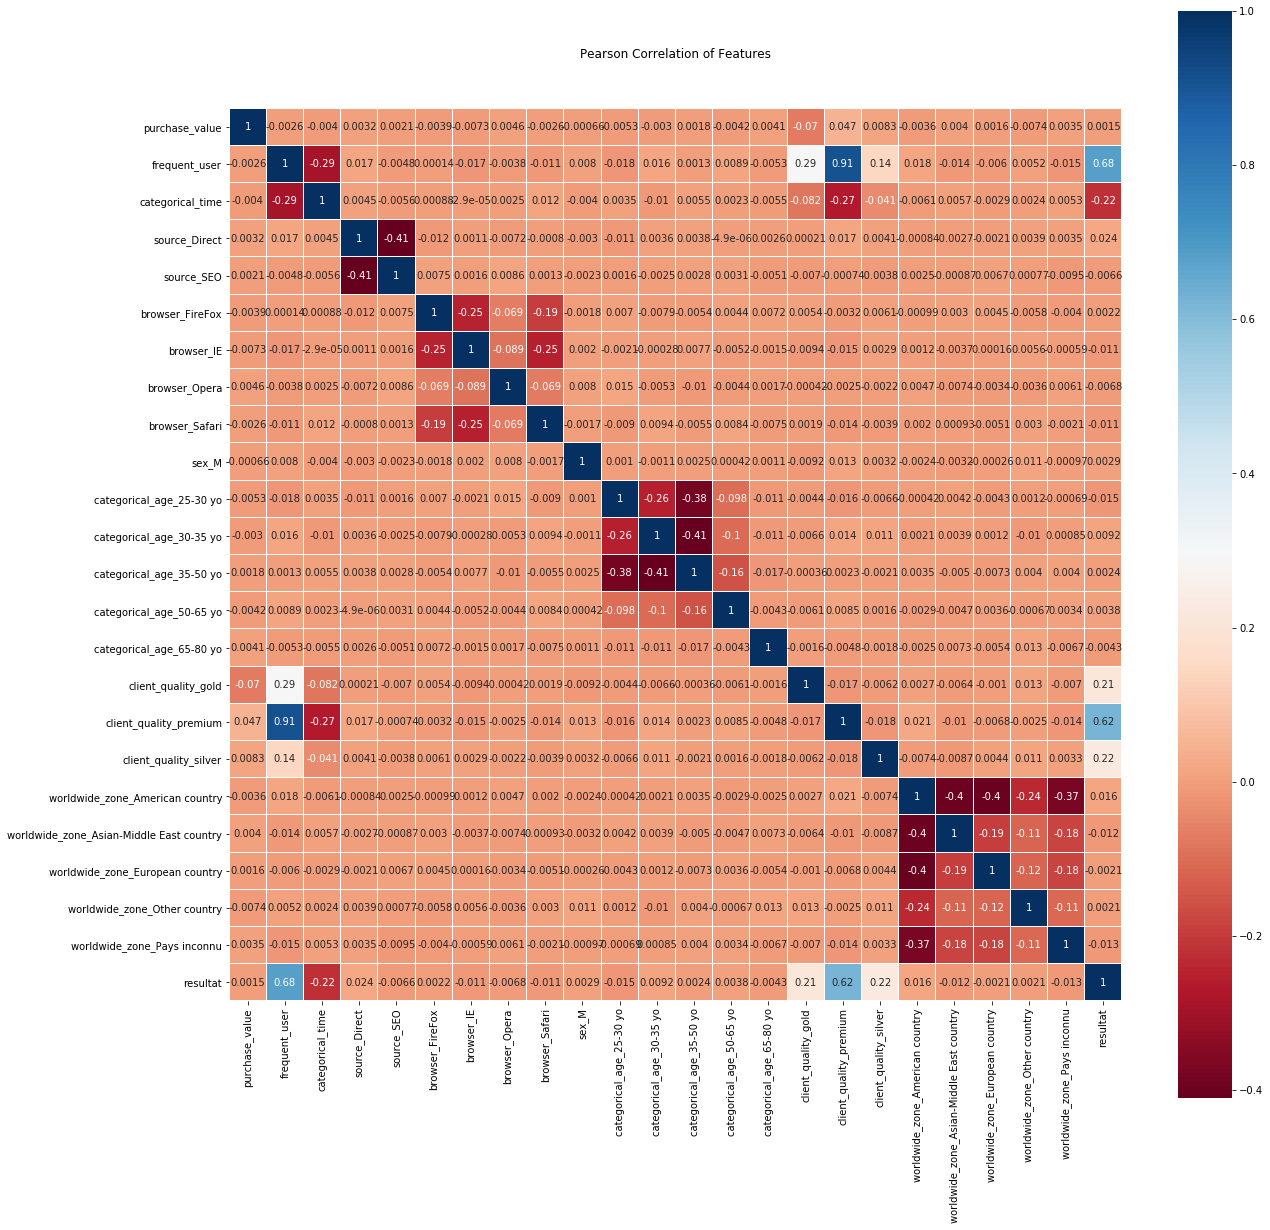

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=12)
sns.heatmap(check_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Corrélations fortes de la variable cible résultat avec les variables frequent_user, categorical_time, client_quality.

Random Forest

In [0]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier( n_estimators=50,      # nombre d'arbres generes et testes
                              max_depth=10,         # nombre maximum de niveaux par arbre
                              random_state=40,      # permet de "fixer" la maniere dont l'aleatoire est genere
                              min_samples_leaf= 10,
                              class_weight='balanced') 
rfc=RFC.fit(X_train, y_train)

#Evaluation du modèle
print("score train: ", RFC.score(X_train, y_train))
print("score test : ", RFC.score(X_test, y_test)) 

score train:  0.9569687895507449
score test :  0.9559606921880687


In [0]:
# k-folds cross validation pour appuyer ce score 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfc,X_test, y_test, cv=10).mean()
print("Moyenne cross-validation score: {}".format(scores))

Moyenne cross-validation score: 0.9569533313206733


In [0]:
#prédiction pour les valeurs de X_test
y_pred = rfc.predict(X_test)

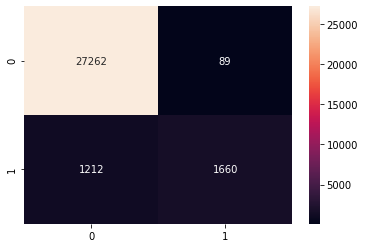

In [0]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt="d")

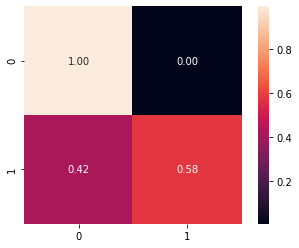

In [0]:
cm1 = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(cm1, annot=True, square=True, fmt=".2f")

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27351
           1       0.95      0.58      0.72      2872

    accuracy                           0.96     30223
   macro avg       0.95      0.79      0.85     30223
weighted avg       0.96      0.96      0.95     30223



95.8% de bonnes prédictions sur le nombre total d'observations.

In [0]:
# DummyClassifier pour prédire uniquement cible 0
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.9049730337822188


L'accuracy score en faisant l'hypothèse que tous les achats ne sont pas des fraudes est de 90.64%. Le modèle fait mieux que la base line.

In [0]:
#Proportion prédite de fraudes TP prédites sur le jeu de test
p1=cm[1,1]/(len(y_pred))
print("proportion de TP (fraudes bien prédites) dans le jeu de test: {}" .format(p1))
#Proportion de fraudes FN non prédites sur le jeu de test
p2=cm[1,0]/len(y_pred)
print('proportion de FN (fraudes non prédites) dans le jeu de test: {}' .format(p2))

proportion de TP (fraudes bien prédites) dans le jeu de test: 0.05492505707573702
proportion de FN (fraudes non prédites) dans le jeu de test: 0.04010190914204414


La proportion de fraudes effectives mais qui n'ont pas été prédites s'avérent très importantes. Il faut améliorer le modèle pour diminuer la part des FN. 


In [0]:
# Calcul de la valeur moyenne de la proportion de fraudes avec 99% de degrés de confiance
import math
#Effectif total de la population
N=len(dataset)-1

# calcul de la moyenne et de l'écart type de la proportion de fraudes de la population
mean_Pf=y.mean()
stdev=y.std()

# Intervalle de confiance fixé (3.09 pour 99.8%)
confidence=99/100

# Z correspondant
Z=2.58

# Calcul de l'intervalle de confiance de la moyenne de la proportion des fraudes de la population
demi_amp_inter=Z*mean_Pf*math.sqrt((mean_Pf*(1-mean_Pf)/N))

print("La moyenne de proportion de fraudes est de {}$ +/- {}$" .format(round(mean_Pf,4),round(demi_amp_inter,4)))

La moyenne de proportion de fraudes est de resultat    0.0936
dtype: float64$ +/- resultat    0.0002
dtype: float64$


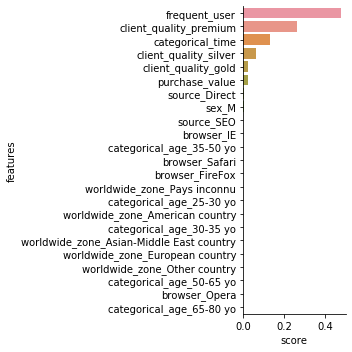

In [0]:
# On confirme les paramètres qui jouent un rôle important. ici la purchase_value se manifeste. 
feature_importance = pd.DataFrame({"features": X_train.columns[:], "score": np.abs(RFC.feature_importances_)}).sort_values(by="score", ascending=False)
sns.catplot(x="score",y="features", data=feature_importance, kind="bar" )

On peut constater que les variables créées sont particulièrement appréciées du modèle. La variable **frequent_user**, qui témoigne d'achats récurrents par un même device_id, est le feature le plus important. Suivi de la variable **client_quality_premium** qui témoigne d'un certain montant cumulé dans l'historique des achats par un même device_id. La variable **purchase_value** est aussi utile.
Le **genre**, le **browser** et les variables créées **worldwide_zone** ou **categorical_age** n'ont pas d'importance.  Nous laisserons donc de côté ces features dans la construction des modèles finaux.

In [0]:
#Nous faisons une GridSearch pour optimiser le modèle
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()
params = {'max_depth' : np.arange(1,10,5),
         'min_samples_leaf' : [10, 20],
         'n_estimators' : range(20,50)}

grid =  GridSearchCV(estimator=RFC, param_grid= params, cv = 10)
grid.fit(X_train, y_train)

In [0]:
print(grid.best_params_)

{'max_depth': 6, 'min_samples_leaf': 10, 'n_estimators': 28}


In [0]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9568540515501439

Adaboost

In [0]:
AdaBoostClassifier?

In [0]:
#on va entraîner le modèle pour le faire passer de weak learner à strong learner
from sklearn.ensemble import AdaBoostClassifier

#classifier_ada = AdaBoostClassifier()
classifier_ada = AdaBoostClassifier(base_estimator=model)

classifier_ada.fit(X_train, y_train)
classifier_ada.score(X_test, y_test)

0.9573503623068524

XGBoost

In [0]:
XGBClassifier?

In [0]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(booster='gbtree',learning_rate=0.5, n_estimators=50)
classifier_xgb.fit(X_train, y_train)
classifier_xgb.score(X_test, y_test)

0.9574165370744135

La méthode de boosting XGBoost donne sensiblement les meilleurs résultats.




In [0]:
#On va faire une GridSearch pour optimiser le modèle
from sklearn.model_selection import GridSearchCV
classifier_xgb2 = XGBClassifier(booster='gbtree')
parameters = {'n_estimators':[20 , 30, 50],
              "learning_rate":[0.5, 0.3, 0.1]}

In [0]:
grid_xgb = GridSearchCV(classifier_xgb2, parameters)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 0.3, 0.1],
                         'n_estimators': [20, 30, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [0]:
print(grid_xgb.best_params_)

{'learning_rate': 0.5, 'n_estimators': 20}


In [0]:
model = grid_xgb.best_estimator_
model.score(X_test, y_test)

0.9575157992257552

Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Evaluation du modèle
print("score train: ", lr.score(X_train, y_train))
print("score test : ", lr.score(X_test, y_test)) 

In [0]:
# k-folds cross validation pour appuyer ce score 
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,X_test, y_test, cv=10).mean()
print("Moyenne cross-validation score: {}".format(scores))

Moyenne cross-validation score: 0.9531153501513764


In [0]:
#prédiction pour les valeurs de X_test
y_pred = lr.predict(X_test)

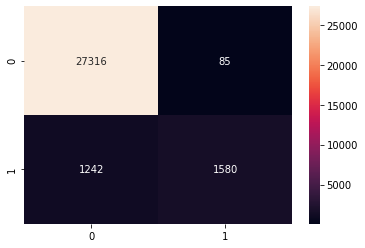

In [0]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred)
sns.heatmap(cm5, annot=True,fmt="d")

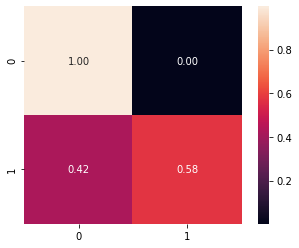

In [0]:
cm6 = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(cm6, annot=True, square=True, fmt=".2f")

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27365
           1       0.96      0.58      0.72      2858

    accuracy                           0.96     30223
   macro avg       0.96      0.79      0.85     30223
weighted avg       0.96      0.96      0.95     30223



95.8% de bonnes prédictions sur le nombre total d'observations.

Support Vector Machine

In [0]:
#Support Vector Machine 
from sklearn.svm import SVC
svm = SVC(kernel='linear', class_weight='balanced')

In [0]:
#Données train et test splittées et normalisées au-dessus

In [0]:
#Fitting des données de train et score
%time svm.fit(X_train, y_train)

CPU times: user 4min 48s, sys: 1.06 s, total: 4min 49s
Wall time: 4min 50s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
%time svm.score(X_test, y_test)

CPU times: user 28.4 s, sys: 177 ms, total: 28.6 s
Wall time: 28.6 s


0.9547364589881878

Accuracy sensiblement meilleure pour le modèle SVC que le RFC

Représentation de la courbe ROC (modèle RF) sur le jeu train global

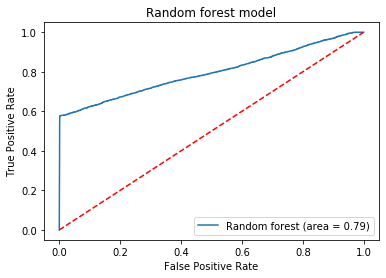

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest model')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

Représentation de la courbe ROC sur le jeu train1

In [0]:
rfc2=RFC.fit(X_train1, y_train1)

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train1,
                                rfc2.predict_proba(X_train1)[:,1])
roc_auc = roc_auc_score(y_train1, rfc2.predict_proba(X_train1)[:,1])

In [0]:
roc_auc

0.8646129200025987

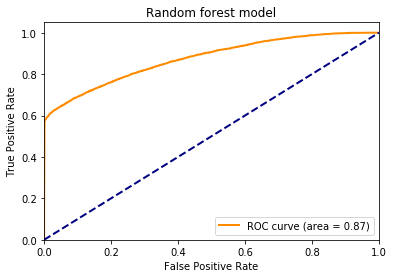

In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest model')
plt.legend(loc="lower right")
plt.show()

In [0]:
roc = pd.DataFrame({"tpr":tpr,
                    "fpr":fpr,
                    "threshold":thresholds})
pd.options.display.max_rows = 999
roc_zoom = roc[((roc.tpr>0.8) & (roc.tpr<1))]

No handles with labels found to put in legend.


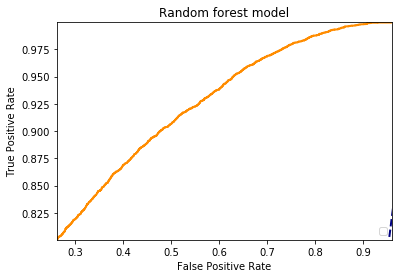

In [0]:
#zoom sur le point de changement de pente
plt.figure()
lw = 2
plt.plot(roc_zoom.fpr, roc_zoom.tpr, color='darkorange',
         lw=lw)
plt.plot([roc_zoom.tpr.min(), roc_zoom.tpr.max()],
         [roc_zoom.fpr.min(), roc_zoom.fpr.max()],
         color='navy', lw=lw, linestyle='--')
plt.xlim([roc_zoom.fpr.min(), roc_zoom.fpr.max()])
plt.ylim([roc_zoom.tpr.min(), roc_zoom.tpr.max()])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest model')
plt.legend(loc="lower right")
plt.show()

In [0]:
roc_zoom

Représentation de la courbe ROC sur le jeu train2

In [0]:
rfc3=RFC.fit(X_train2, y_train2)

In [0]:
X_train2["proba"] = rfc3.predict_proba(X_train2)[:,1]

In [0]:
X_train2_easy = X_train2[X_train2.proba > 0.9]
X_train2_hard = X_train2[X_train2.proba <= 0.9]

In [0]:
X_train2_hard.head(15)

,purchase_value,frequent_user,categorical_time,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,categorical_age_25-30 yo,categorical_age_30-35 yo,categorical_age_35-50 yo,categorical_age_50-65 yo,categorical_age_65-80 yo,client_quality_gold,client_quality_premium,client_quality_silver,worldwide_zone_American country,worldwide_zone_Asian-Middle East country,worldwide_zone_European country,worldwide_zone_Other country,worldwide_zone_Pays inconnu,proba
47523,0.002813,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.300588
96468,-1.087908,0,4,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0.297334
7212,0.820854,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0.299407
96966,0.657246,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.301868
39928,0.602710,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.287575
144195,-1.469661,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0.255736
17014,2.456937,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0.223798
54109,-1.415125,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.289449
5427,0.984463,0,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.303109
40916,-0.869764,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.320332


In [0]:
full_hard= pd.merge(X_train2_hard, X_train, right_index=True, left_index=True)

In [0]:
full_hard.head()

,purchase_value_x,frequent_user_x,categorical_time_x,source_Direct_x,source_SEO_x,browser_FireFox_x,browser_IE_x,browser_Opera_x,browser_Safari_x,sex_M_x,categorical_age_25-30 yo_x,categorical_age_30-35 yo_x,categorical_age_35-50 yo_x,categorical_age_50-65 yo_x,categorical_age_65-80 yo_x,client_quality_gold_x,client_quality_premium_x,client_quality_silver_x,worldwide_zone_American country_x,worldwide_zone_Asian-Middle East country_x,worldwide_zone_European country_x,worldwide_zone_Other country_x,worldwide_zone_Pays inconnu_x,proba,purchase_value_y,frequent_user_y,categorical_time_y,source_Direct_y,source_SEO_y,browser_FireFox_y,browser_IE_y,browser_Opera_y,browser_Safari_y,sex_M_y,categorical_age_25-30 yo_y,categorical_age_30-35 yo_y,categorical_age_35-50 yo_y,categorical_age_50-65 yo_y,categorical_age_65-80 yo_y,client_quality_gold_y,client_quality_premium_y,client_quality_silver_y,worldwide_zone_American country_y,worldwide_zone_Asian-Middle East country_y,worldwide_zone_European country_y,worldwide_zone_Other country_y,worldwide_zone_Pays inconnu_y
97011,0.111781,0,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0.346890,0.111781,0,2,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
39119,1.313171,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.300484,1.313171,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
17636,-0.816566,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.318316,-0.816566,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
61381,1.859258,0,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.288136,1.859258,0,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
22798,1.094737,0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0.304796,1.094737,0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
#on isole dans le jeu les fraudes faciles à prédire des fraudes difficiles à prédire.
easy = pd.merge(X_train2_easy, y_train2, right_index=True, left_index=True)
hard = pd.merge(X_train2_hard, y_train2, right_index=True, left_index=True )
X_easy = easy.drop("resultat", axis=1)
X_hard = hard.drop("resultat", axis=1)
y_easy = easy["resultat"]
y_hard = hard["resultat"]


In [0]:
#Fitting du modèle RFC
RFC = RandomForestClassifier(  n_estimators=50,      # nombre d'arbres generes et testes
#                               max_depth=10,         # nombre maximum de niveaux par arbre
#                               random_state=40,      # permet de "fixer" la maniere dont l'aleatoire est genere
#                               min_samples_leaf= 10,
                               class_weight='balanced') 
model_easy = RFC
model_hard = RFC

model_easy.fit(X_easy, y_easy)
model_hard.fit(X_hard, y_hard)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

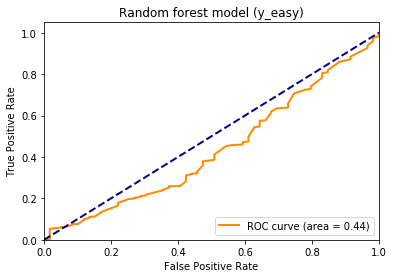

In [0]:
#courbe roc relative au modèle RF appliqué aux fraudes faciles à prédire
fpr_easy, tpr_easy, thresholds_easy = roc_curve(y_easy,
                                 model_easy.predict_proba(X_easy)[:,1])
roc_auc_easy = roc_auc_score(y_easy, model_easy.predict_proba(X_easy)[:,1])
plt.figure()
lw = 2
plt.plot(fpr_easy, tpr_easy, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_easy)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest model (y_easy)')
plt.legend(loc="lower right")
plt.show()

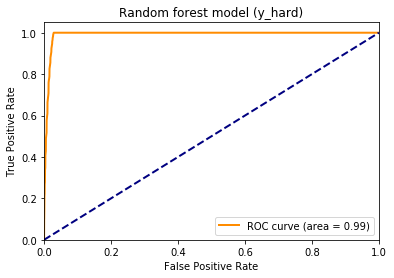

In [0]:
#courbe roc relative au modèle RF appliqué aux fraudes difficiles à prédire

fpr_hard, tpr_hard, thresholds_hard = roc_curve(y_hard,
                                 model_hard.predict_proba(X_hard)[:,1])
roc_auc_hard = roc_auc_score(y_hard, model_hard.predict_proba(X_hard)[:,1])
plt.figure()
lw = 2
plt.plot(fpr_hard, tpr_hard, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_hard)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest model (y_hard)')
plt.legend(loc="lower right")
plt.show()

In [0]:
y_hard.mean()

In [0]:
pd.read_

In [0]:
y_easy.mean()

0.8959517657192075

In [0]:
#Nous réduisons le nombre de variables explicatives à celles jugées importantes à l'issue du feature engineering plus haut.
kept_labels=["frequent_user","client_quality_gold","client_quality_premium","client_quality_silver","categorical_time","purchase_value"]

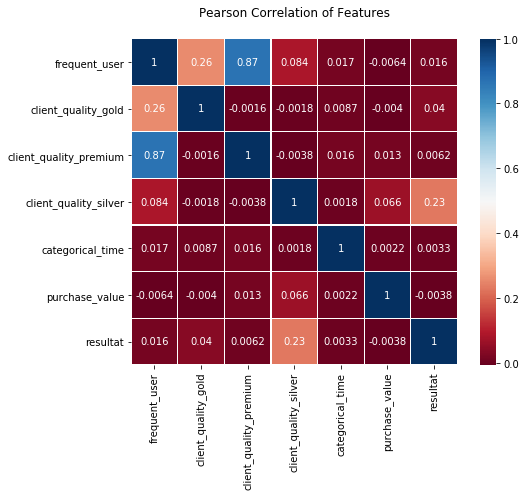

In [0]:
#Vérification des corrélations entre les différentes variables et surtout avec le résultat du jeu difficile à prédire.
x_hard=X_hard[kept_labels]
check_corr=pd.merge(x_hard, y_hard, right_index=True, left_index=True)

colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=12)
sns.heatmap(check_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

GENERATION DU MODELE FINAL : STACKING 



Nous créons quatre objets x_train, x_test, y_train et y_test en vue d'entraîner nos modèles de la première couche. On séparé x_train et y_train en deux parties x_train1 y_train1 et x_train2 et y_train2. La première partie servira à entraîner les modèles de la première couche (ou base models) et la deuxième partie que l'on transformera grâce aux bases models servira à entraîner le modèle de la deuxième couche ou meta-model. Ceci permet d'assurer l'indépendance entre les données d'entraînement des deux couches et de limiter ainsi le sur-apprentissage.

Les features sont maintenant restreintes à celles ayant montré de l'importance lors du premier résultat obtenu par le modèle RFC.

In [0]:
X_train1_fin=X_train1[kept_labels]
X_train2_fin=X_train2[kept_labels]
y_train1_fin=y_train1
y_train2_fin=y_train2
X_test_fin=X_test[kept_labels]

Nous préparons un modèle de stacking. Les modèles de première couche seront un Random Forest Classifier et un XGBoost XGBClassifier. Le modèle de seconde couche une LogisticRegressor.

In [0]:
#Pairplots entre différentes variables explicatives

g = sns.pairplot(check_corr[[u"frequent_user",u"client_quality_gold",u"client_quality_premium",u"client_quality_silver",u"categorical_time",u"purchase_value"]], palette = 'seismic',size=3,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [0]:
kept_labels=["frequent_user","client_quality_gold","client_quality_premium","client_quality_silver","categorical_time","purchase_value"]

In [0]:
#Nous préparons les modèles de la première couche de notre stacking
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=6, max_features='sqrt')

from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree',learning_rate=0.5, n_estimators=200)

In [0]:
rf.fit(X = X_train1_fin, y = y_train1_fin)
xgb.fit(X = X_train1_fin, y = y_train1_fin)

rf_train_pred = rf.predict_proba(X_train2_fin)
xgb_train_pred = xgb.predict_proba(X_train2_fin)

rf_test_pred = rf.predict_proba(X_test_fin)
xgb_test_pred = xgb.predict_proba(X_test_fin)

print("Training is complete")

Training is complete


In [0]:
#création d'un dataframe contenant les feature_importance de chaque variable

In [0]:
rf_feature = rf.feature_importances_
xgb_feature = xgb.feature_importances_

In [0]:
# Create a dataframe with features
feature_dataframe = pd.DataFrame({
     "features": X_train1_fin.columns[:],
     "Score Random Forest": np.abs(rf_feature),
     "Score XGB": np.abs(xgb_feature)}).sort_values(by="Score Random Forest", ascending=False)

feature_dataframe

,features,Score Random Forest,Score XGB
0,frequent_user,0.502643,0.894297
2,client_quality_premium,0.302728,0.001475
4,categorical_time,0.100019,0.030210
3,client_quality_silver,0.058984,0.064631
1,client_quality_gold,0.029050,0.006869
5,purchase_value,0.006576,0.002519


In [0]:
#Création d'une nouvelle colonne contenant la moyenne des feature importance pour chaque variable

feature_dataframe['Score Mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(6)


,features,Score Random Forest,Score XGB,Score Mean
0,frequent_user,0.502643,0.894297,0.698470
2,client_quality_premium,0.302728,0.001475,0.152101
4,categorical_time,0.100019,0.030210,0.065115
3,client_quality_silver,0.058984,0.064631,0.061807
1,client_quality_gold,0.029050,0.006869,0.017960
5,purchase_value,0.006576,0.002519,0.004547


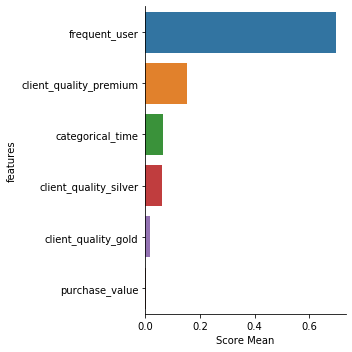

In [0]:
# Nous avions réduit le nombre de features. Les paramètres qui jouent un rôle important:
sns.catplot(x="Score Mean",y="features", data=feature_dataframe, kind="bar" )

Second-Level Predictions from the First-level Output

In [0]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_train_pred[:,1],
                                         'XGBoost': xgb_train_pred[:,1]})
base_predictions_train.head()

,RandomForest,XGBoost
0,0.042745,0.044134
1,0.045408,0.042547
2,0.045031,0.050692
3,0.042670,0.042920
4,0.043161,0.037855


In [0]:
base_predictions_test = pd.DataFrame( {'RandomForest': rf_test_pred[:,1],
                                        'XGBoost': xgb_test_pred[:,1]})
base_predictions_test.head()

,RandomForest,XGBoost
0,0.042672,0.038196
1,0.043259,0.055001
2,0.980159,0.983264
3,0.045212,0.065286
4,0.045784,0.054238


Second level learning model via LogisticRegressor



In [0]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR(class_weight="balanced")
lr.fit(base_predictions_train, y_train2)
#prédiction pour les valeurs de base_predictions_test
predictions = lr.predict(base_predictions_test)

#Evaluation du modèle
print("score train: {:.3f}" .format(LR.score(base_predictions_train, y_train2)))
print("score test : {:.3f}" .format(LR.score(base_predictions_test, y_test)))

In [0]:
#Evaluation du modèle de base
print("score train: ", rf.score(X_train2_fin,y_train2_fin))
print("score test : ", rf.score(X_test_fin,y_test))

score train:  0.9584084705103814
score test :  0.9579459352149026


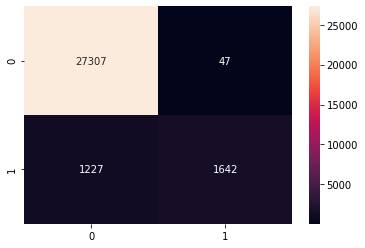

In [0]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, predictions)
sns.heatmap(cm3, annot=True,fmt="d")

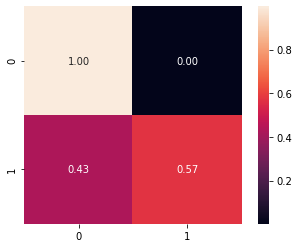

In [0]:
cm4 = confusion_matrix(y_test, predictions, normalize="true")
sns.heatmap(cm4, annot=True, square=True, fmt=".2f")

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27354
           1       0.97      0.57      0.72      2869

    accuracy                           0.96     30223
   macro avg       0.96      0.79      0.85     30223
weighted avg       0.96      0.96      0.95     30223

